<a href="https://colab.research.google.com/github/JuliPolu/Computer_Vision_TF_Cource/blob/main/CV_Assignment_2_CNN_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Свёрточные нейронные сети. Домашнее задание 2

Реализовать и обучить (с нуля) СНС для задачи классификации изображений на датасете CIFAR-10
Библиотеки: [Python, Tensorflow]

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
import tensorflow as tf

In [ ]:
# import os
# os.path.join(os.getcwd(), 'saved_models')

## Загрузка и подготовка датасета CIFAR 10


In [ ]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Загрузка датасета CIFAR-10
(train_x, train_y), (test_x, test_y) = cifar10.load_data()

# Нормализация данных
train_x = train_x.astype('float32') / 255
test_x = test_x.astype('float32') / 255

# Преобразование меток классов в категориальный формат
train_y = to_categorical(train_y, 10)
test_y = to_categorical(test_y, 10)

print(train_x.shape, train_x.dtype)
print(test_x.shape, test_x.dtype)
print(train_y.shape, train_y.dtype)
print(test_y.shape, test_y.dtype)

170498071/170498071 [==============================] - 3s 0us/step
(50000, 32, 32, 3) float32
(10000, 32, 32, 3) float32
(50000, 10) float32
(10000, 10) float32


In [ ]:
classes = ['самолет', 'автомобиль', 'птица', 'кот', 'олень', 'собака', 'лягушка', 'лошадь', 'корабль', 'грузовик']

## Визуализация датасета CIFAR-10

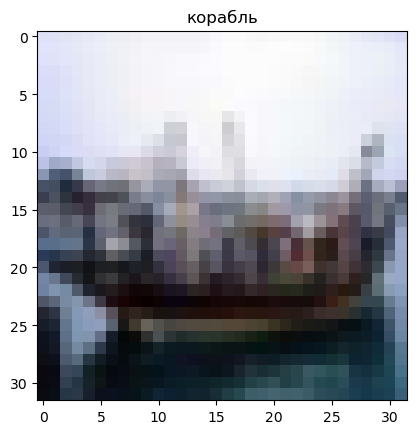

In [ ]:
N = 18

plt.imshow(test_x[N])
plt.title(classes[np.argmax(test_y[N,:])])
plt.show()

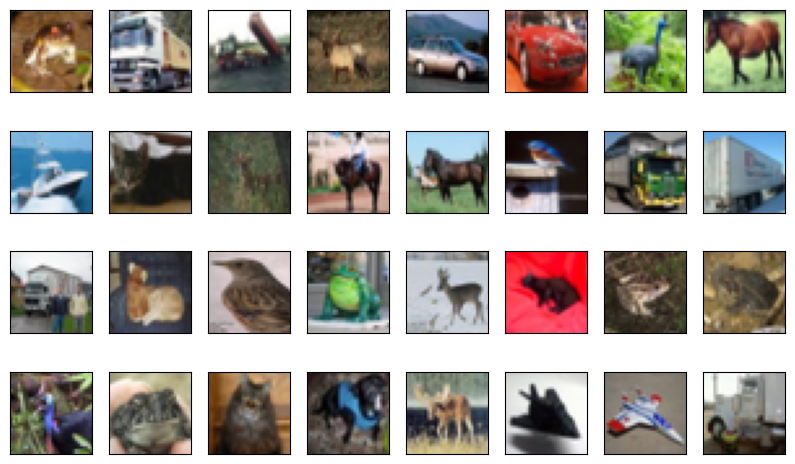

In [ ]:
some_samples = train_x[:32, ...]

fig = plt.figure(figsize=(10, 6))
for j in range(some_samples.shape[0]):
    ax = fig.add_subplot(4, 8, j+1)
    ax.imshow(some_samples[j])
    plt.xticks([]), plt.yticks([])
plt.show()

## Создание пайплайна данных

In [ ]:
NUM_EPOCHS = 8
BATCH_SIZE = 128

train_ds = tf.data.Dataset.from_tensor_slices((train_x, train_y))
train_ds = train_ds.shuffle(buffer_size=train_x.shape[0])
train_ds = train_ds.repeat(NUM_EPOCHS)
train_ds = train_ds.batch(BATCH_SIZE)

## Создание модели CNN

In [ ]:
class Model(tf.keras.Model):

    def __init__(self, num_cnn, kernel, conv_3 = 0):
      super(Model, self).__init__()

      self.num_cnn = num_cnn
      self.kernel = kernel
      self.conv_3 = conv_3
      self.conv1 = tf.keras.layers.Conv2D(self.num_cnn, (kernel, kernel), activation='relu', padding='same')
      self.conv2 = tf.keras.layers.Conv2D(self.num_cnn*2, (kernel, kernel), activation='relu', padding='same')
      self.conv3 = tf.keras.layers.Conv2D(self.num_cnn*4, (kernel, kernel), activation='relu', padding='same')
      self.fc1 = tf.keras.layers.Dense(256, activation='relu')
      self.fc2 = tf.keras.layers.Dense(10, activation=None)
      self.max_pool = tf.keras.layers.MaxPooling2D((2, 2), (2, 2))
      self.flatten = tf.keras.layers.Flatten()

      def call(self, input):

In [ ]:
class Model(tf.keras.Model):

    def __init__(self, num_cnn, kernel, conv_3 = 0):
        super(Model, self).__init__()

        self.num_cnn = num_cnn
        self.kernel = kernel
        self.conv_3 = conv_3
        self.conv1 = tf.keras.layers.Conv2D(self.num_cnn, (kernel, kernel), activation='relu', padding='same')
        self.conv2 = tf.keras.layers.Conv2D(self.num_cnn*2, (kernel, kernel), activation='relu', padding='same')
        self.conv3 = tf.keras.layers.Conv2D(self.num_cnn*4, (kernel, kernel), activation='relu', padding='same')
        self.fc1 = tf.keras.layers.Dense(256, activation='relu')
        self.fc2 = tf.keras.layers.Dense(10, activation=None)
        self.max_pool = tf.keras.layers.MaxPooling2D((2, 2), (2, 2))
        self.flatten = tf.keras.layers.Flatten()

    def call(self, inp):

        out = self.conv1(inp)
        out = self.max_pool(out)
        out = self.conv2(out)
        out = self.max_pool(out)
        if self.conv_3==1:
            out = self.conv3(out)
            out = self.max_pool(out)
        out = self.flatten(out)
        out = self.fc1(out)
        out = self.fc2(out)

        return out

# model = Model(num_cnn=32, kernel=3)


## Функция потерь и функция вычисления точности

In [ ]:
def loss(logits, labels):
    return tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
        logits=logits, labels=labels))

def accuracy(logits, labels):
    predictions = tf.argmax(logits, axis=1, output_type=tf.int32)
    labels = tf.argmax(labels, axis=1, output_type=tf.int32)
    return tf.reduce_mean(tf.cast(tf.equal(predictions, labels), dtype=tf.float32))

## Подготовка к обучению

In [ ]:
# LEARNING_RATE = 0.001

# # optimizer = tf.keras.optimizers.SGD(LEARNING_RATE)
# optimizer = tf.keras.optimizers.Adam(LEARNING_RATE)

# # writer = tf.summary.create_file_writer('logs/sgd')
# writer = tf.summary.create_file_writer('logs/adam')

## Цикл обучения модели

In [ ]:
num_cnn_list = [16, 32, 64]
kernel_list = [3, 5, 7]
conv_3_list = [0, 1]
learning_rate_list = [0.001, 0.005]
final_accuracy_list = []

In [ ]:
%%time

for num_cnn in num_cnn_list:
    for kernel in kernel_list:
        for conv_3 in conv_3_list:
            for LEARNING_RATE in learning_rate_list:

                writer = tf.summary.create_file_writer(f'logs/cnn{num_cnn}kern{kernel}c3_{conv_3}LR{LEARNING_RATE}')
                model = Model(num_cnn, kernel, conv_3)
                optimizer = tf.keras.optimizers.Adam(LEARNING_RATE)

                for iteration, (images, labels) in enumerate(train_ds):

                    # Forward
                    with tf.GradientTape() as tape:
                        logits = model(images)
                        loss_value = loss(logits, labels)

                    # Backward
                    grads = tape.gradient(loss_value, model.trainable_variables)
                    optimizer.apply_gradients(zip(grads, model.trainable_variables))

                    # Calc and display loss/accuracy
                    if iteration % 200 == 0:
                        test_logits = model(test_x[:1000])
                        accuracy_value = accuracy(test_logits, test_y[:1000])

                        print("[%4d] Accuracy: %5.2f %%" % (
                            iteration, accuracy_value.numpy()*100))

                        with writer.as_default():
                            tf.summary.scalar('accuracy', accuracy_value, iteration)
                            tf.summary.scalar('loss', loss_value, iteration)

                test_logits = model(test_x)
                accuracy_value = accuracy(test_logits, test_y).numpy()
                print("Final Accuracy: %5.2f %%" % (accuracy_value*100))
                final_accuracy_list.append(accuracy_value*100)


[   0] Accuracy: 10.90 %
[ 200] Accuracy: 52.10 %
[ 400] Accuracy: 55.50 %
[ 600] Accuracy: 60.80 %
[ 800] Accuracy: 61.40 %
[1000] Accuracy: 62.10 %
[1200] Accuracy: 64.80 %
[1400] Accuracy: 63.50 %
[1600] Accuracy: 67.30 %
[1800] Accuracy: 66.80 %
[2000] Accuracy: 68.60 %
[2200] Accuracy: 67.00 %
[2400] Accuracy: 69.50 %
[2600] Accuracy: 68.00 %
[2800] Accuracy: 68.50 %
[3000] Accuracy: 68.20 %
Final Accuracy: 69.68 %
[   0] Accuracy: 10.00 %
[ 200] Accuracy: 46.10 %
[ 400] Accuracy: 47.50 %
[ 600] Accuracy: 53.40 %
[ 800] Accuracy: 57.90 %
[1000] Accuracy: 61.20 %
[1200] Accuracy: 62.20 %
[1400] Accuracy: 61.90 %
[1600] Accuracy: 63.70 %
[1800] Accuracy: 61.60 %
[2000] Accuracy: 61.70 %
[2200] Accuracy: 62.60 %
[2400] Accuracy: 61.70 %
[2600] Accuracy: 65.20 %
[2800] Accuracy: 63.30 %
[3000] Accuracy: 63.50 %
Final Accuracy: 63.04 %
[   0] Accuracy: 10.90 %
[ 200] Accuracy: 46.00 %
[ 400] Accuracy: 55.30 %
[ 600] Accuracy: 59.50 %
[ 800] Accuracy: 62.00 %
[1000] Accuracy: 63.50 %
[1

In [ ]:
# %%time

# test_logits = model(test_x)
# accuracy_value = accuracy(test_logits, test_y).numpy()
# print("Final Accuracy: %5.2f %%" % (accuracy_value * 100))

Final Accuracy: 72.27 %

CPU times: user 21 s, sys: 3.32 s, total: 24.3 s

Wall time: 4.78 s


In [ ]:
model_names_list = []
for num_cnn in num_cnn_list:
    for kernel in kernel_list:
        for conv_3 in conv_3_list:
            for LEARNING_RATE in learning_rate_list:
                model_names_list.append(f'cnn{num_cnn}kern{kernel}c3_{conv_3}LR{LEARNING_RATE}')

## Оценка качества модели

In [ ]:
import pandas as pd

In [ ]:
results_df = pd.DataFrame({'Name': model_names_list, 'Test_accuracy': final_accuracy_list})
results_df.sort_values('Test_accuracy', ascending=False, inplace = True)
results_df

,Name,Test_accuracy
26,cnn64kern3c3_1LR0.001,75.720000
30,cnn64kern5c3_1LR0.001,74.449998
14,cnn32kern3c3_1LR0.001,73.740000
18,cnn32kern5c3_1LR0.001,72.790003
6,cnn16kern5c3_1LR0.001,72.289997
28,cnn64kern5c3_0LR0.001,72.020000
12,cnn32kern3c3_0LR0.001,71.939999
24,cnn64kern3c3_0LR0.001,71.880001
16,cnn32kern5c3_0LR0.001,71.749997
2,cnn16kern3c3_1LR0.001,71.179998


Наилучшие результаты показали модели со скоростью обучения 0.001, ядром свертки 3 и 3 слоями с максимальным количеством сверточных нейронов

## TensorBoard

In [ ]:
%load_ext tensorboard
%tensorboard --logdir logs

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 1349), started 0:24:26 ago. (Use '!kill 1349' to kill it.)

## Функция для инференса и отображения результата предсказания

In [ ]:
#Best model

model = Model(num_cnn = 64, kernel = 3, conv_3 = 1)
LEARNING_RATE = 0.001
optimizer = tf.keras.optimizers.Adam(LEARNING_RATE)

for iteration, (images, labels) in enumerate(train_ds):

    # Forward
    with tf.GradientTape() as tape:
        logits = model(images)
        loss_value = loss(logits, labels)

    # Backward
    grads = tape.gradient(loss_value, model.trainable_variables)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))

    # Calc and display loss/accuracy
    if iteration % 200 == 0:
        test_logits = model(test_x[:1000])
        accuracy_value = accuracy(test_logits, test_y[:1000])

        print("[%4d] Accuracy: %5.2f %%" % (
            iteration, accuracy_value.numpy()*100))

        with writer.as_default():
            tf.summary.scalar('accuracy', accuracy_value, iteration)
            tf.summary.scalar('loss', loss_value, iteration)

test_logits = model(test_x)
accuracy_value = accuracy(test_logits, test_y).numpy()
print("Final Accuracy: %5.2f %%" % (accuracy_value*100))

[   0] Accuracy: 10.20 %
[ 200] Accuracy: 51.60 %
[ 400] Accuracy: 62.70 %
[ 600] Accuracy: 67.30 %
[ 800] Accuracy: 67.60 %
[1000] Accuracy: 73.80 %
[1200] Accuracy: 73.70 %
[1400] Accuracy: 75.80 %
[1600] Accuracy: 72.50 %
[1800] Accuracy: 73.90 %
[2000] Accuracy: 77.20 %
[2200] Accuracy: 78.00 %
[2400] Accuracy: 79.20 %
[2600] Accuracy: 79.20 %
[2800] Accuracy: 77.30 %
[3000] Accuracy: 77.30 %
Final Accuracy: 76.57 %


In [ ]:
def test_item(sample):

    logits = model(sample[None, ...])[0]
    prediction = tf.nn.softmax(logits)
    ans = np.argmax(prediction)

    fig = plt.figure(figsize=(12,4))

    ax = fig.add_subplot(1, 2, 1)
    ax.imshow(sample)
    plt.xticks([]), plt.yticks([])

    ax = fig.add_subplot(1, 2, 2)
    bar_list = ax.bar(np.arange(10), prediction, align='center')
    bar_list[ans].set_color('g')
    ax.set_xticks(np.arange(10))
    ax.set_xlim([-1, 10])
    ax.grid(True)

    plt.show()

    print('Predicted: {}'.format(ans))

## Запуск предсказания для изображения случайной картинки из CIFAR-10

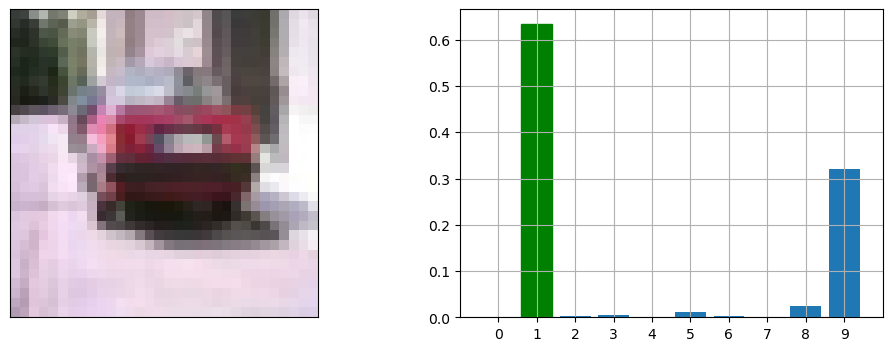

Predicted: 1
True Answer: 1


In [ ]:
import random
idx = random.randint(0, test_x.shape[0])
sample = test_x[idx]
test_item(sample)

print('True Answer: {}'.format(tf.argmax(test_y[idx])))